In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon
import pingouin as pg

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
exam_scores = []

for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)

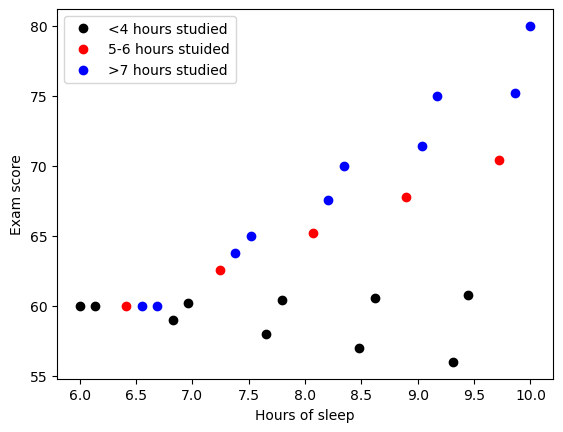

In [9]:
plotidx = hours_studied<4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

plotidx = np.logical_and(hours_studied>4.9,hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied', '5-6 hours stuided', '>7 hours studied'))
plt.show()

In [19]:
# design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*ave_sleep_hrs)).T
print(desmat)

multireg = sm.OLS(endog=exam_scores, exog=desmat).fit()
multireg.summary()

[[  1.           6.           2.          36.        ]
 [  1.           6.13793103   3.2         37.67419738]
 [  1.           6.27586207   4.4         39.38644471]
 [  1.           6.4137931    5.6         41.13674197]
 [  1.           6.55172414   6.8         42.92508918]
 [  1.           6.68965517   8.          44.75148633]
 [  1.           6.82758621   2.          46.61593341]
 [  1.           6.96551724   3.2         48.51843044]
 [  1.           7.10344828   4.4         50.45897741]
 [  1.           7.24137931   5.6         52.43757432]
 [  1.           7.37931034   6.8         54.45422117]
 [  1.           7.51724138   8.          56.50891795]
 [  1.           7.65517241   2.          58.60166468]
 [  1.           7.79310345   3.2         60.73246136]
 [  1.           7.93103448   4.4         62.90130797]
 [  1.           8.06896552   5.6         65.10820452]
 [  1.           8.20689655   6.8         67.35315101]
 [  1.           8.34482759   8.          69.63614744]
 [  1.    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     33.50
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           4.39e-09
Time:                        01:42:57   Log-Likelihood:                -71.373
No. Observations:                  30   AIC:                             150.7
Df Residuals:                      26   BIC:                             156.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.7945     25.432      3.845      0.001      45.518     150.071
x1           -13.3696      6.455     -2.071      0.048     -26.638      -0.101
x2             1.7222      0.255      6.754      0.000       1.198       2.246
x3             0.9866      0.403      2.451      0.021       0.159       1.814
==============================================================================
Omnibus:                        5.520   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.454
Skew:                          -0.941   Prob(JB):                        0.108
Kurtosis:                       3.152   Cond. No.                     3.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
multireg = sm.OLS(endog=exam_scores, exog=desmat[:,0:-1]).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           8.76e-09
Time:                        01:44:47   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                           0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.